<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/linear_regression_1_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generating Dataset

In [74]:
print(np.random.rand())
# gives between 0 to 1 numebrs > 1D
x = np.random.rand(3)
print(x.shape)
# define dimension
y=np.random.rand(3,2,3)
print(y.shape)

0.6637906596599397
(3,)
(3, 2, 3)


-0.004631860591368187 0.09667161693760974


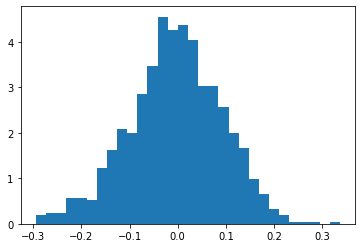

In [75]:
mu, sigma = 0, 0.1 # mean and standard deviation
# scale shows the scattering of the data
s = np.random.normal(loc=mu, scale=sigma, size=1000)
print(s.mean(), s.std())

plt.hist(x=s, bins=30, density=True)
plt.show()

In [76]:
X = np.random.rand(100) * 20
y = 2.358 * X - 3.121
y = y + np.random.normal(scale=4, size=y.shape)

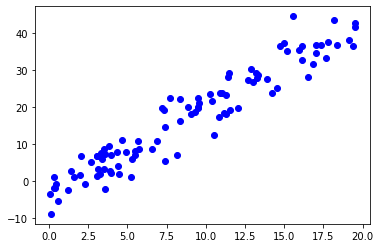

In [77]:
plt.plot(X, y, 'bo')

# Line Equation

intercept form
<img src="https://latex.codecogs.com/svg.latex?\frac{x}{a}+\frac{y}{b}=1"/>
standard form
<img src="https://latex.codecogs.com/svg.latex?ax+by=c"/>
point-slope Form
<img src="https://latex.codecogs.com/svg.latex?y-y_1=m(x-x_1)"/>
slope-intercept Form
<img src="https://latex.codecogs.com/svg.latex?y=mx+b"/>

[-4.91065325 24.49939754]


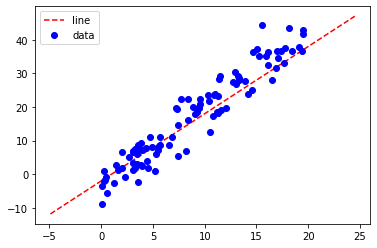

In [78]:
# y = mx + b
m = 2
b = -2
 
x_line = np.array([X.min() - 5, X.max() + 5])
print(x_line)
y_line = m * x_line + b

plt.plot(x_line, y_line, 'r--',label="line")
plt.plot(X,  y, 'bo',label="data")
plt.legend()
plt.show()

# Finding Best Line

<img src="https://latex.codecogs.com/svg.latex?MSE=\frac{1}{2N}\sum_{i=1}^N(y_i-\hat{y}_i)^2"/>

In [79]:
def MSE(actual, predicted):
    # return np.sum((actual-predicted)**2) / (2*actual.shape[0])
    return np.mean((actual - predicted) ** 2) / 2

In [80]:
# y = mx + b > the algo must define the m and b for us > for example
m = 2.5
b = -3.2
h = m * X + b

# for i in range(X.shape[0]):
#     print('data point {}:\t actual : {},\t predicted: {}'.format(i, y[i], h[i]))

for i in range(3):
    print('data point {}:\t actual : {},\t predicted: {}'.format(i, y[i], h[i]))

MSE(y,h)
# best range of m is [2,3] and b is [-3,-4] > manually

data point 0:	 actual : 18.433723364246518,	 predicted: 24.701173697186032
data point 1:	 actual : 1.34664270151181,	 predicted: 4.509718596238485
data point 2:	 actual : 42.75881399839854,	 predicted: 45.54849386165242


9.560036652984298

In [81]:
# what is happening at the backend of the ml models
min_cost = np.inf
best_m = None
best_b = None

# first we have to find the best range for our parameters
for m in np.arange(2, 4, 0.01):
    for b in np.arange(-4, -2, 0.01):
        h = m * X + b
        cost = MSE(y, h)
        if cost < min_cost:
            min_cost = cost
            best_m = m
            best_b = b
print('best line fit: {} * x + {} and cost is {}'.format(best_m, best_b, min_cost))

best line fit: 2.2999999999999936 * x + -3.210000000000017 and cost is 7.380380722562463


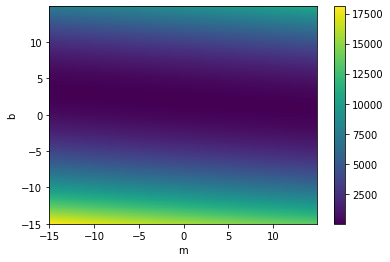

In [82]:
# draw MSE matrix based on m,b
MSE_cost_matrix = np.zeros((300, 300))

all_m_values = np.arange(-15, 15, 0.1)
all_b_values = np.arange(-15, 15, 0.1)

for i, m in enumerate(all_m_values):
    for j, b in enumerate(all_b_values):
        h = m * X + b
        MSE_cost_matrix[i, j] = MSE(y, h)
        
plt.pcolormesh(all_m_values, all_b_values, MSE_cost_matrix)
plt.ylabel('b')
plt.xlabel('m')
plt.colorbar()
plt.show()